(253680, 22)


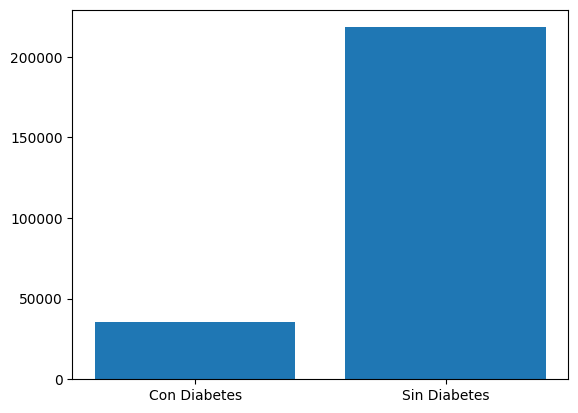

[np.int64(5700), np.int64(7598), np.int64(11123), np.int64(13823), np.int64(16157), np.int64(19819), np.int64(26314), np.int64(30832), np.int64(33244), np.int64(32194), np.int64(23533), np.int64(15980), np.int64(17363)]


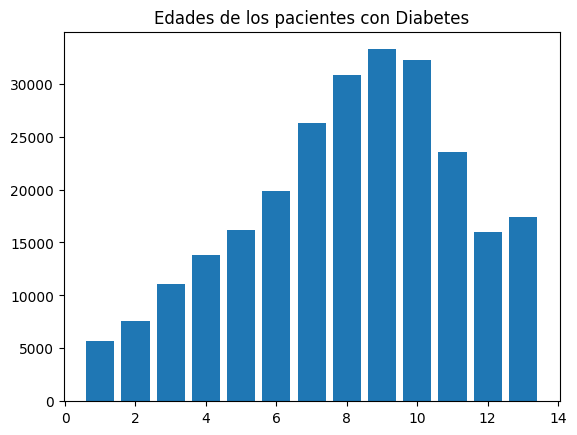

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
archivo3 = "diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(archivo3)
#df.head()

df.select_dtypes(include=[float,int]).corr()

#df.info()

#df.isnull().sum()
print(df.shape)
#df.describe()


df['Diabetes_binary']
df_diabetes = df[ df['Diabetes_binary'] == 1 ]['Diabetes_binary'].count()
df_sin_diabetes = df[ df['Diabetes_binary'] == 0 ]['Diabetes_binary'].count()


# Crear el gráfico
plt.bar(["Con Diabetes","Sin Diabetes"],[df_diabetes, df_sin_diabetes])

# Mostrar el gráfico
plt.show()


edades = []
for x in range(13):
    edades.append(df[ df["Age"] == x+1]["Age"].count())

print(edades)

plt.title("Edades de los pacientes con Diabetes")
plt.bar(range(1,14) , edades)
plt.show()


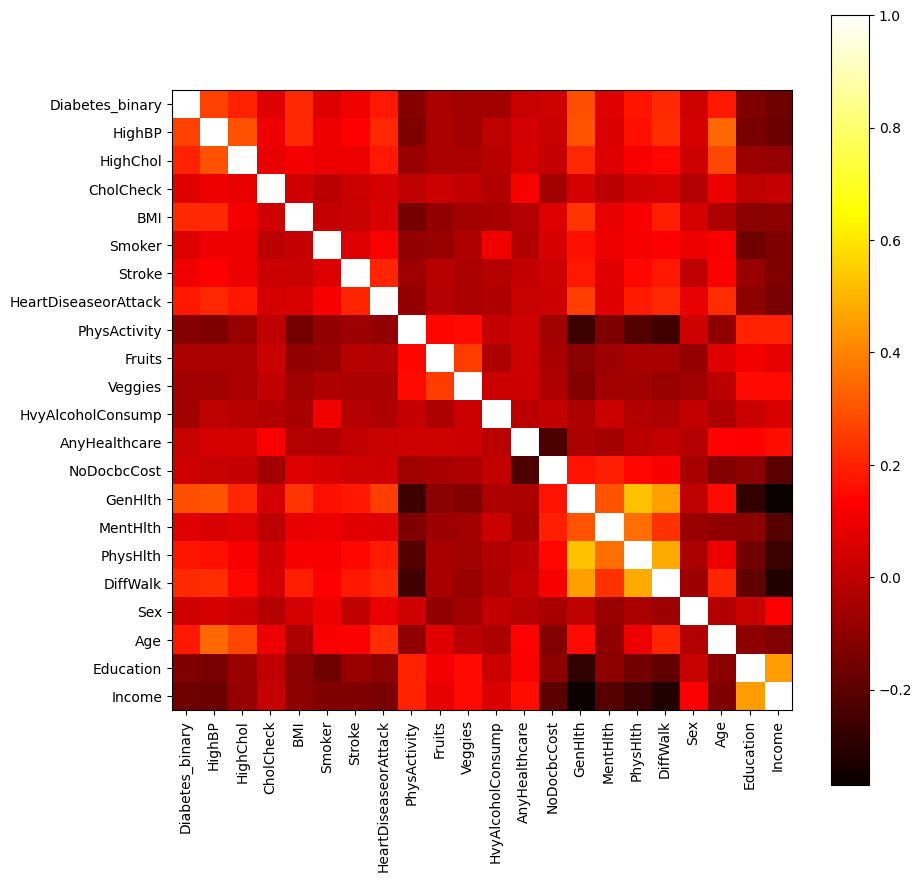

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

archivo3 = "diabetes_binary_health_indicators_BRFSS2015.csv"

df = pd.read_csv(archivo3)

## aqui lo admito le copie el codigo a fabia xd
correlacion = df.corr()
numero_de_columnas = len(correlacion)
correlacion.style.background_gradient(cmap='coolwarn')

x = range(numero_de_columnas)
y = correlacion.columns

plt.imshow(correlacion, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(x, y, rotation='vertical')
plt.yticks(x, y)
plt.gcf().set_size_inches(10, 10)




# Con esto grafico quiero saber que datos esta relacionados

¿Me gustaria saber si el que una persona sea fumador esta ?

[np.int64(174), np.int64(4043), np.int64(9478), np.int64(62750), np.int64(69910), np.int64(107325)]
[np.int64(9811), np.int64(11783), np.int64(15994), np.int64(20135), np.int64(25883), np.int64(36470), np.int64(43219), np.int64(90385)]


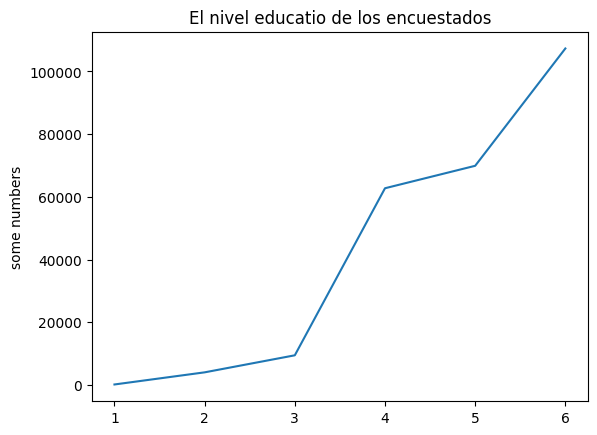

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12496\1525965970.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ df["Diabetes_binary"] == 1][df["Education"]==1]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
556,1.0,1.0,1.0,1.0,42.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,5.0,30.0,20.0,1.0,0.0,9.0,1.0,1.0
7806,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,2.0,0.0,0.0,0.0,9.0,1.0,3.0
8586,1.0,1.0,0.0,1.0,35.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,1.0,12.0,1.0,3.0
8709,1.0,0.0,1.0,1.0,28.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,1.0,3.0
14690,1.0,1.0,0.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,1.0,12.0,1.0,2.0
17489,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,8.0,1.0,8.0
17574,1.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,1.0,2.0
17639,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,1.0,30.0,1.0,1.0,9.0,1.0,2.0
18757,1.0,1.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,14.0,0.0,0.0,9.0,1.0,1.0
18895,1.0,1.0,1.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,5.0,0.0,10.0,1.0,0.0,6.0,1.0,2.0


In [ ]:

educ = []

for x in range(6):
    educ.append(df[ df["Education"] == x+1]["Education"].count())

print(educ)

Income = []

for x in range(8):
    Income.append(df[ df["Income"] == x+1]["Income"].count())

print(Income)

maximo = max(*educ, *Income)

maximo

plt.title("El nivel educatio de los encuestados")
plt.plot(range(1,7),educ)
plt.ylabel('some numbers')
plt.show()


names_educ_diabetes = []
educ_diabetes = []
for x in range(6):
    educ_diabetes.append(df[ df["Diabetes_binary"] == 1][df["Education"]==1]["Education"].count())
    educ_diabetes.append(df[ df["Diabetes_binary"] == 1][df["Education"]==1]["Education"].count())
    names_educ_diabetes.append("{} Con Diabetes".format(x))
    names_educ_diabetes.append("{} Sin Diabetes".format(x))

plt.title("Nivel educativo de los encuestado con y sin diabetes")


In [10]:
df["Income"]

0         3.0
1         1.0
2         8.0
3         6.0
4         4.0
         ... 
253675    7.0
253676    4.0
253677    2.0
253678    1.0
253679    2.0
Name: Income, Length: 253680, dtype: float64